<a href="https://colab.research.google.com/github/AnzenKodo/.github/blob/main/AI_QR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Download packages


!pip install -q virtualenv
!virtualenv venv

!source ./venv/bin/activate; pip install -q diffusers==0.17.1 transformers==v4.27.1 xformers==0.0.20 accelerate==0.20.3 qrcode==v7.4.2 torch==2.0.1 "qrcode[pil]"==7.4.2

import sys
import os
dir=os.listdir("./venv/lib")[0]
sys.path.append(f"./venv/lib/{dir}/site-packages")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 42.6 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 1651ms
  creator CPython3Posix(dest=/content/venv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.1.2, setuptools==67.8.0, wheel==0.40.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
#@title Setup Diffusion & Control Net module

import torch
from diffusers import StableDiffusionControlNetImg2ImgPipeline, ControlNetModel, DDIMScheduler

repo_id = "gsdf/Counterfeit-V2.5" #@param ["CompVis/stable-diffusion-v1-4", "stabilityai/stable-diffusion-2-base", "hakurei/waifu-diffusion", "andite/anything-v4.0", "prompthero/openjourney-v2", "andite/pastel-mix", "gsdf/Counterfeit-V2.5"]
device = "cuda" #@param { type: "string" }
controlnet_repo_id = "DionTimmer/controlnet_qrcode-control_v1p_sd15" #@param ["DionTimmer/controlnet_qrcode", "DionTimmer/controlnet_qrcode-control_v1p_sd15"]

controlnet = ControlNetModel.from_pretrained(
    controlnet_repo_id,
    torch_dtype=torch.float16)

pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    repo_id,
    controlnet=controlnet,
    safety_checker=None,
    torch_dtype=torch.float16
)

pipe.enable_xformers_memory_efficient_attention()
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 61.5 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


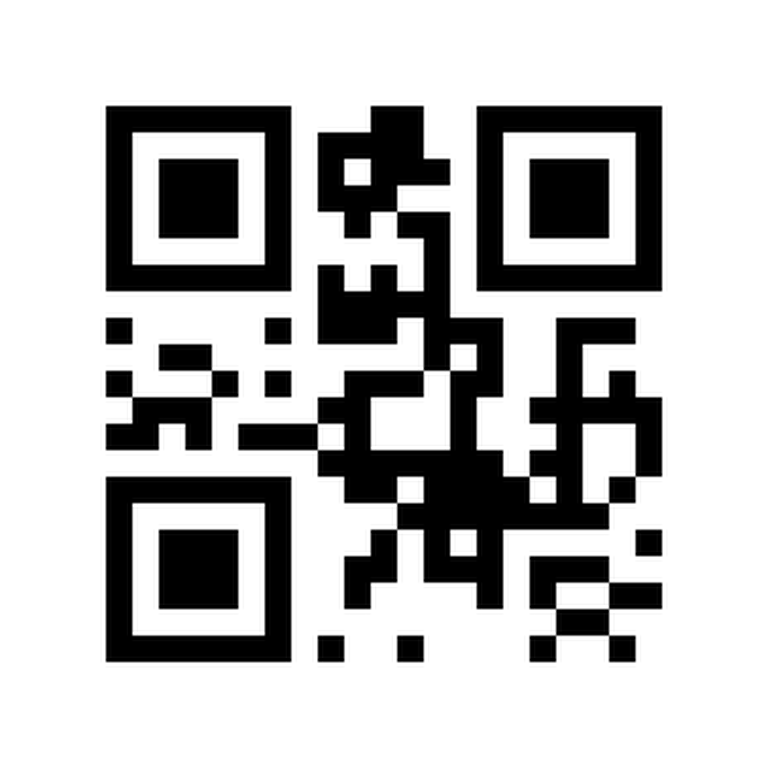

In [ ]:
#@title Setup QRCode
from PIL import Image

def resize_image(image, resolution: int):
    input_image = image.convert("RGB")
    W, H = input_image.size
    k = float(resolution) / min(H, W)
    H *= k
    W *= k
    H = int(round(H / 64.0)) * 64
    W = int(round(W / 64.0)) * 64
    img = input_image.resize((W, H), resample=Image.LANCZOS)
    return img

In [ ]:
#@title Genrate Image

from diffusers.utils import load_image
import qrcode

seed=643555648 #@param {type: "integer"}
generator = torch.manual_seed(seed)
prompt="black hair, slim body, hotgirl, with boy" #@param { type: "string"}
negative_prompt="ugly, disfigured, low quality, blurry, weird hand" #@param { type: "string"}
url = "huggingface.co" #@param { type: "string" }
height=768 #@param { type: "integer"}
width=768 #@param { type: "integer"}
image_url = "https://raw.githubusercontent.com/AnzenKodo/assets/main/a8e3554b43fe2c2330d644c7d2b8390d%20(1)%20(1)%20(1).jpg" #@param { type: "string" }
#@markdown `150` is default.
num_inference_steps=150 #@param { type: "integer"}
#@markdown `1.5` is default.
controlnet_conditioning_scale=1.5 #@param { type: "number"}
#@markdown `0.9` is default.
strength=0.9 #@param { type: "number" }
#@markdown `20` is default.
guidance_scale=20 #@param { type: "number" }

image = pipe(
    prompt,
    negative_prompt,
    image=resize_image(load_image(image_url), width),
    control_image=resize_image(qrcode.make(url), width),
    generator,
    guidance_scale,
    height,
    width,
    controlnet_conditioning_scale,
    strength,
    num_inference_steps,
).images[0]

image

SyntaxError: ignored

In [ ]:
#@title Clear PyTourch cahe
torch.cuda.empty_cache()

NameError: ignored

In [ ]:
!pip -q install flash pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from pyngrok import ngrok ,conf
from flask import Flask, send_file, request
from io import BytesIO
import urllib.parse

app= Flask(__name__)
ngrok_token="2S0W7KofbtiUZxpVdX2Sx5L5j8V_7UaDN2QZfHnKruGi4ecWi" #@param{type:"string"}
conf.get_default().auth_token = ngrok_token
port = 5000 #@param {type:"number"}
public_url =ngrok.connect(port).public_url
print(f" * ngrok tunnel \"{public_url}\" \"http://127.0.0.1:{port}\"")
app.config["BASE_URL"]= public_url

@app.route('/')
def index():
  return "<h1>sneha sankhe</h1>"
if __name__ == '__main__':
  app.run()

 * ngrok tunnel "https://6b68-34-125-209-142.ngrok-free.app" "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [02/Jul/2023 08:19:32] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Jul/2023 08:19:32] "GET /favicon.ico HTTP/1.1" 404 -


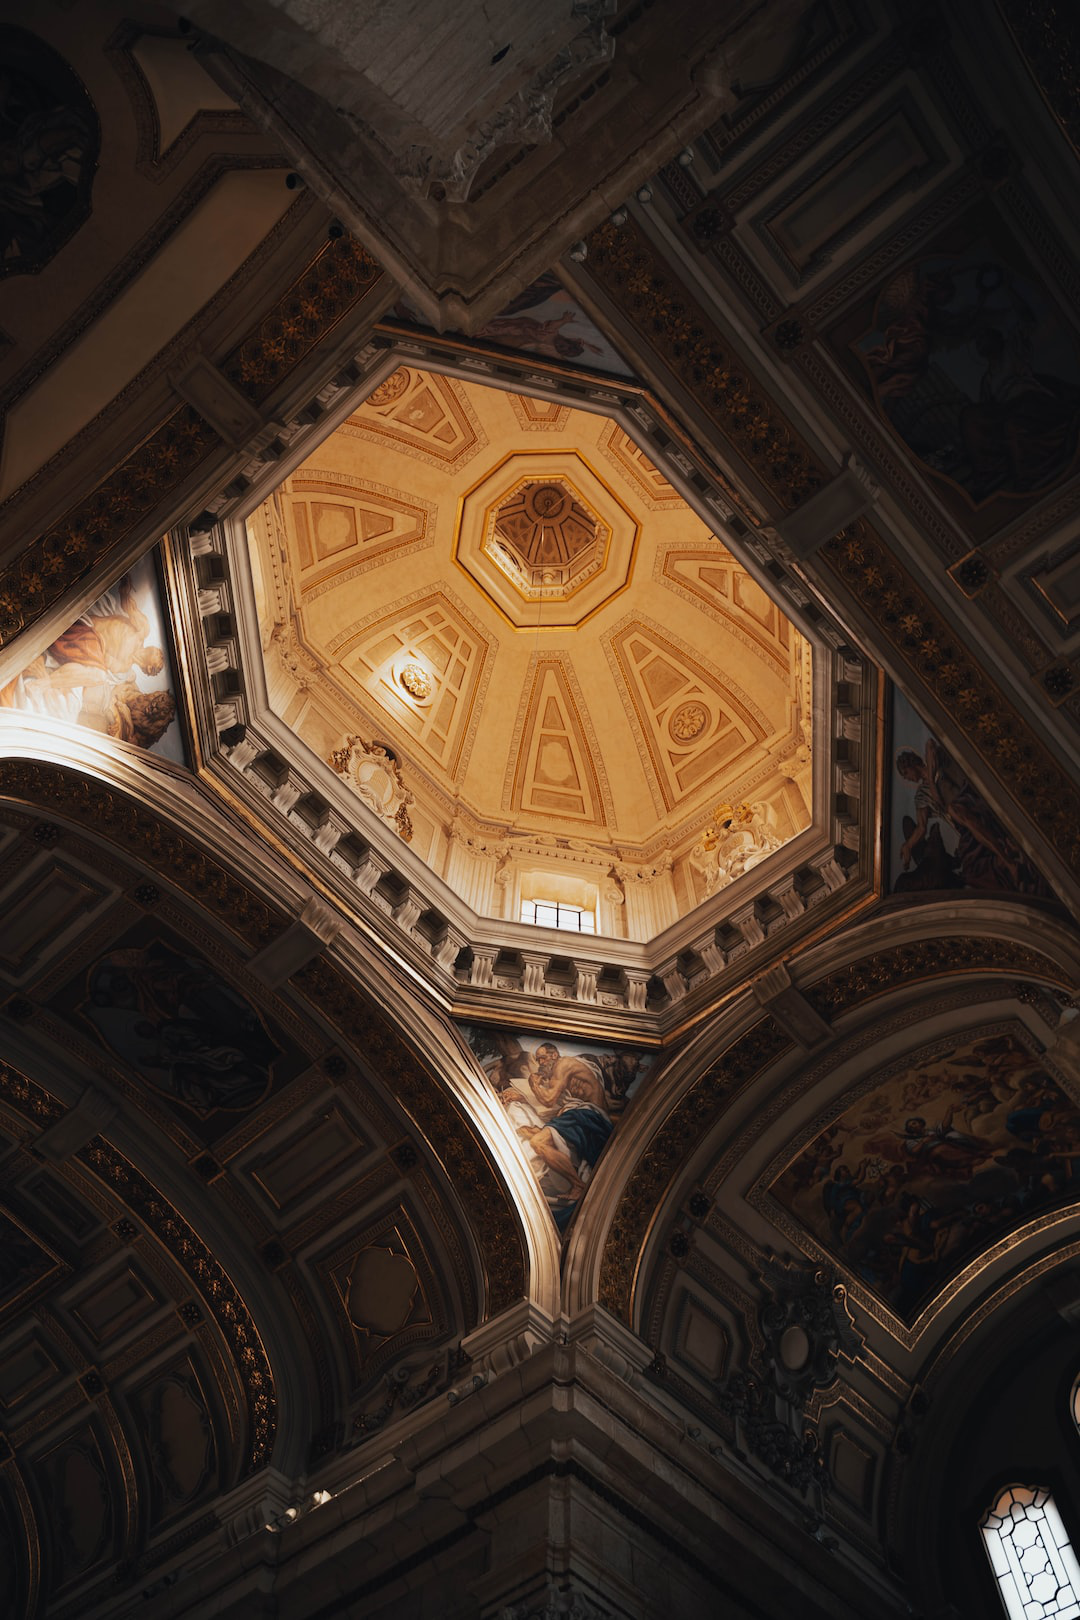

In [ ]:

import requests
from PIL import Image
from io import BytesIO

image_url = "https://source.unsplash.com/random"
response = request.get(image_url)
image = Image.open(BytesIO(response.content))

image